In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import sys
sys.path.append("../scripts/")
from clean_data import DataCleaner
from utils import Utils
from HypothesisPlot import HypothesisPlot 
from DistributionPlots import DistributionPlots 

import warnings
warnings.filterwarnings('ignore')

In [2]:

cleaner = DataCleaner()
util=Utils()
dp=DistributionPlots()
hp=HypothesisPlot()


In [3]:
df = util.load_data('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.shape

(8077, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [6]:
print(f"{cleaner.percent_missing(df)}% the dataset is missing")

0.0% the dataset is missing


since our dataset has no missing value, it is ready for further exploration

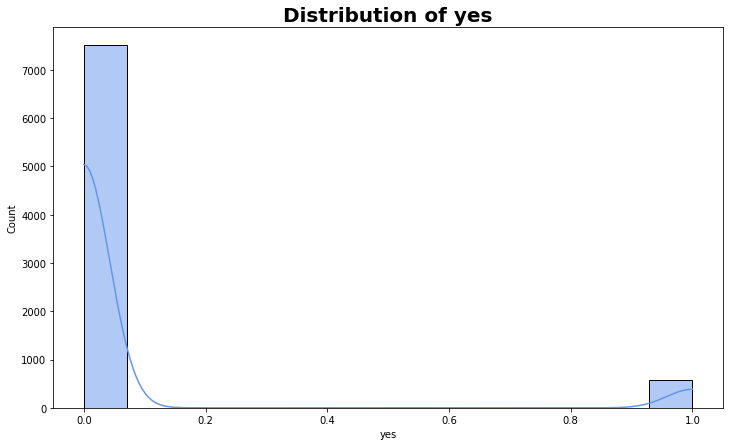

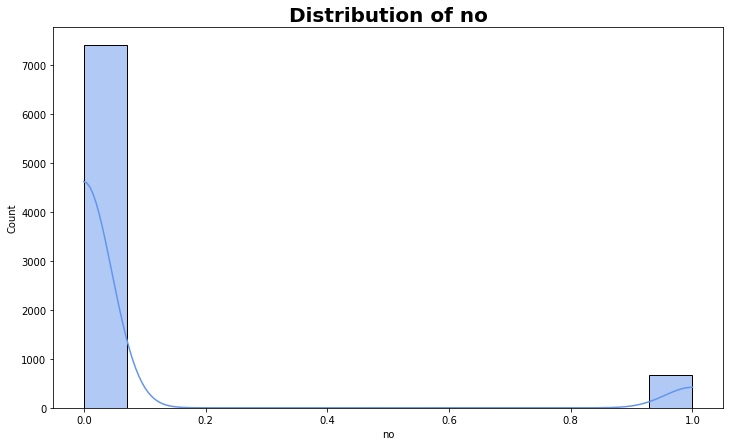

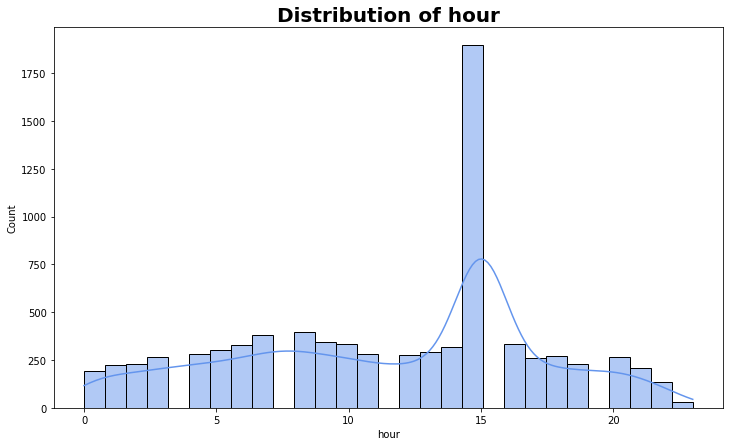

In [7]:
util.plot_hist(df,'yes','cornflowerblue')
util.plot_hist(df,'no','cornflowerblue')
util.plot_hist(df,'hour','cornflowerblue')

In [8]:
cleaner.get_categorical_columns(df)

['auction_id', 'experiment', 'date', 'device_make', 'browser']

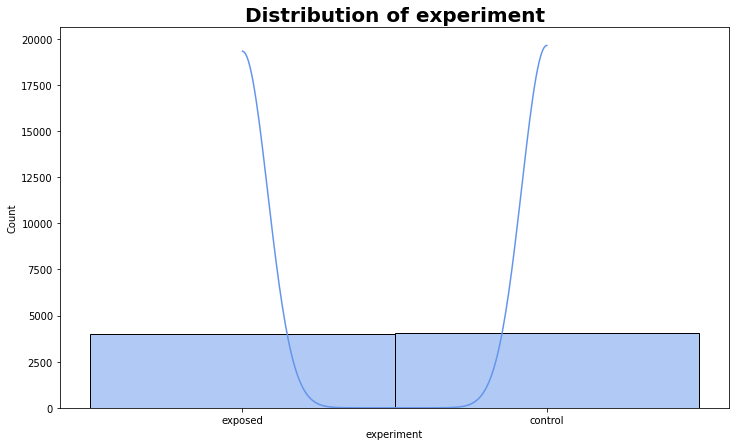

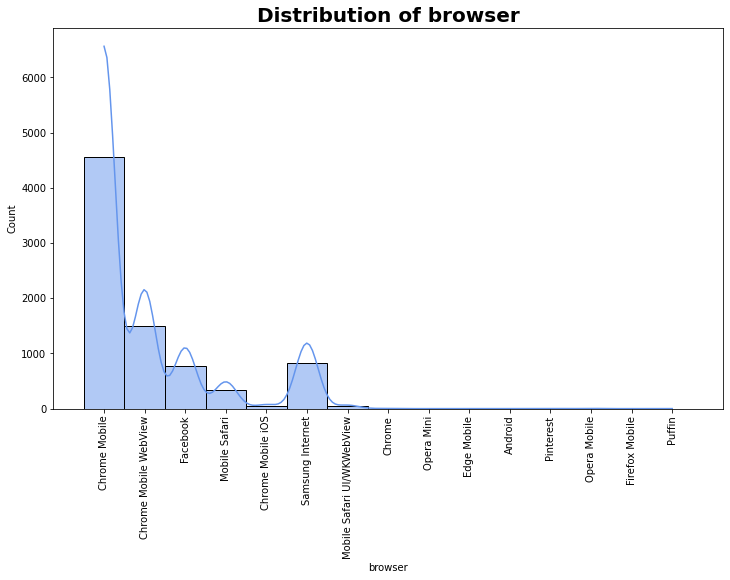

In [9]:
util.plot_hist(df,'experiment','cornflowerblue')
util.plot_hist(df,'browser','cornflowerblue',rot=90)

In [10]:
# if true we know each auction id is unique
len(df['auction_id'].unique())==df.shape[0]

True

In [11]:
# util.plot_hist(df,'device_make','cornflowerblue')
df_by_device=df.groupby('device_make').agg({"auction_id":"count"})
df_by_device

,auction_id
device_make,
5008Y_EEA,1
5099Y,1
6039Y,1
A0001,2
ALE-L21,1
...,...
XiaoMi Redmi S2,1
YAL-L21,3
iPhone,433


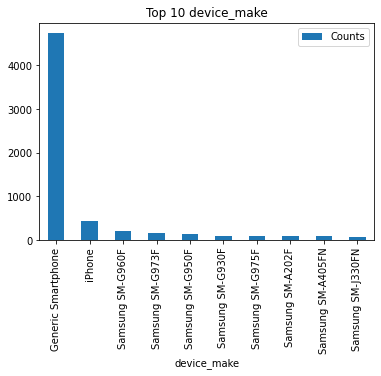

In [12]:
df_by_device.rename(columns={"auction_id":"Counts"},inplace=True)
df_by_device=df_by_device.sort_values(by=['Counts'],ascending=False)
df_by_device.head(10).plot(kind='bar',title="Top 10 device_make")
plt.show()

In [13]:
categorical_columns = cleaner.get_categorical_columns(df)

for col in categorical_columns:
    print(f"There are {len(df[col].unique())} unique values of {col}")

There are 8077 unique values of auction_id
There are 2 unique values of experiment
There are 8 unique values of date
There are 270 unique values of device_make
There are 15 unique values of browser


In [7]:
#categorical vs. numerical
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']

Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


In [8]:
df.groupby('experiment').agg({'auction_id':'count','yes':'sum','no':'sum'})

,auction_id,yes,no
experiment,,,
control,4071,264,322
exposed,4006,308,349


we have 4071 users in the *control* group <br>
we have 4006 users in the *exposed* group
- notice that the sum of 'yes' and 'no' counts doesn't add up to the total count of the group
- we can call them unresponsive users

In [9]:
responsive_users= cleaner.drop_unresponsive(df)
responsive_users.groupby('experiment').agg({'auction_id':'count','yes':'sum','no':'sum'})


,auction_id,yes,no
experiment,,,
control,586,264,322
exposed,657,308,349


In [10]:
responsive_users 

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


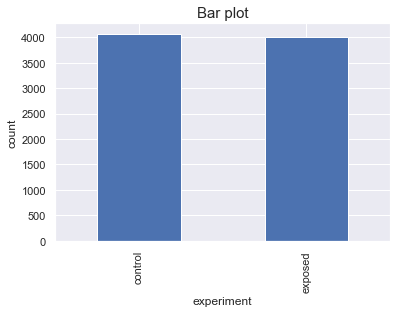

In [11]:
#Visualizing experiment using barplot
sns.set()
df['experiment'].value_counts().plot(kind='bar')
plt.title('Bar plot',fontsize=15)
plt.xlabel('experiment',fontsize=12),plt.ylabel('count',fontsize=12)
plt.show()


In [12]:
responsive_users.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [13]:
responsive_users_summary=responsive_users.groupby('experiment').agg({'auction_id':'count','yes':'sum','no':'sum'})
responsive_users_summary.rename(columns={'auction_id':'counts'},inplace=True)
responsive_users_summary

,counts,yes,no
experiment,,,
control,586,264,322
exposed,657,308,349


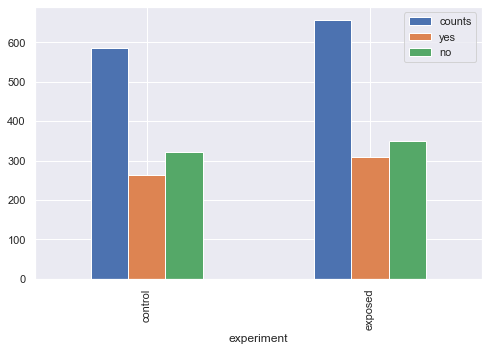

In [14]:
responsive_users_summary.plot(kind='bar',figsize=(8,5))
plt.show()

In [15]:
hour_data = responsive_users.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['Number of users']
hour_data = hour_data.reset_index()
hour_data

,hour,Number of users
0,0,31
1,1,32
2,2,33
3,3,44
4,4,46
5,5,49
6,6,50
7,7,59
8,8,67
9,9,57


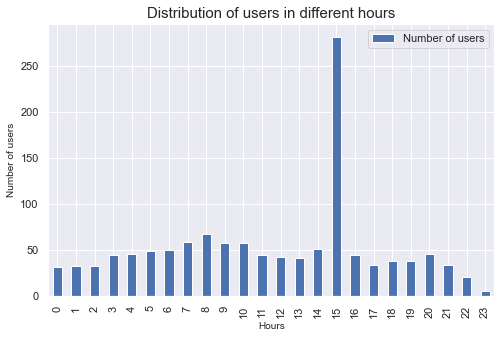

In [16]:
hour_data[['Number of users']].plot(kind='bar',figsize=(8,5))
plt.xlabel('Hours',fontsize=10)
plt.ylabel('Number of users',fontsize=10)
plt.title('Distribution of users in different hours',fontsize=15)
plt.show()

In [17]:
responsive_users

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [18]:
browser_group_df = responsive_users.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'yes': 'sum','no': 'sum'})
browser_group_df

,experiment,hour,yes,no
browser,,,,
Chrome,2,27,1,1
Chrome Mobile,695,8041,314,381
Chrome Mobile WebView,227,2403,116,111
Chrome Mobile iOS,1,11,1,0
Facebook,156,1957,69,87
Mobile Safari,14,123,4,10
Mobile Safari UI/WKWebView,3,46,0,3
Samsung Internet,145,1712,67,78


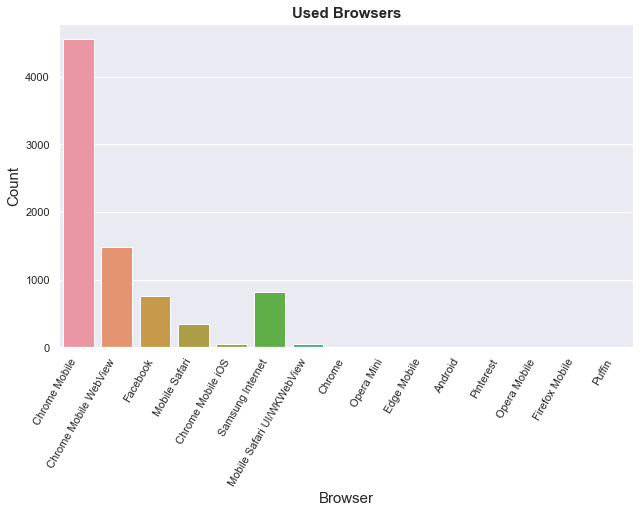

In [19]:
plt.figure(figsize=(9,7))
ax= sns.countplot(x ='browser', data = df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browser', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Used Browsers', fontsize=15, fontweight='bold')
plt.show()

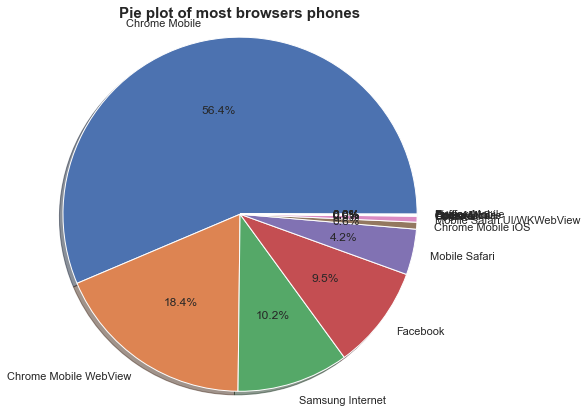

In [20]:
top_10 = df['browser'].value_counts()
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie plot of most browsers phones', fontsize=15, fontweight='bold')
plt.show()

### Classical A/B Testing

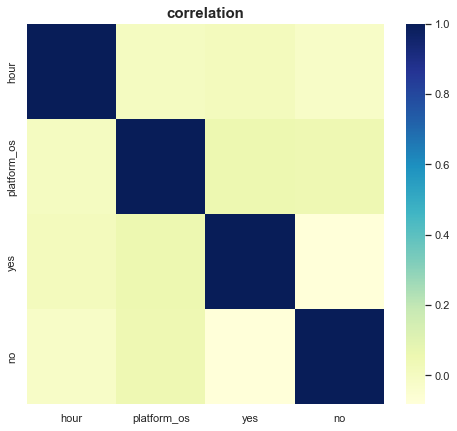

In [21]:
# Correlation Analysis

plt.figure(figsize=(8, 7))
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu")
plt.title('correlation', fontsize=15, fontweight='bold')
plt.show()

In [22]:
ab_summary = responsive_users.pivot_table(values='yes', index='experiment', aggfunc=np.sum)
ab_summary['total'] = responsive_users.pivot_table(values='yes', index='experiment', aggfunc=lambda x: len(x))
ab_summary['no']=ab_summary['total']-ab_summary['yes']
ab_summary['baseline rate'] = responsive_users.pivot_table(values='yes', index='experiment') # sums all the yes values(counts yes values) and divide to the total so it gives us the yes percentage
ab_summary=ab_summary[['yes','no','total','baseline rate']]
ab_summary

,yes,no,total,baseline rate
experiment,,,,
control,264,322,586,0.450512
exposed,308,349,657,0.468798


In [23]:
cr_exposed=ab_summary.loc['exposed','baseline rate']
cr_control=ab_summary.loc['control','baseline rate']
print(f"the conversion rate between control and exposed group is {cr_exposed-cr_control}")

the conversion rate between control and exposed group is 0.018285619295484168


### visualization of aware groups

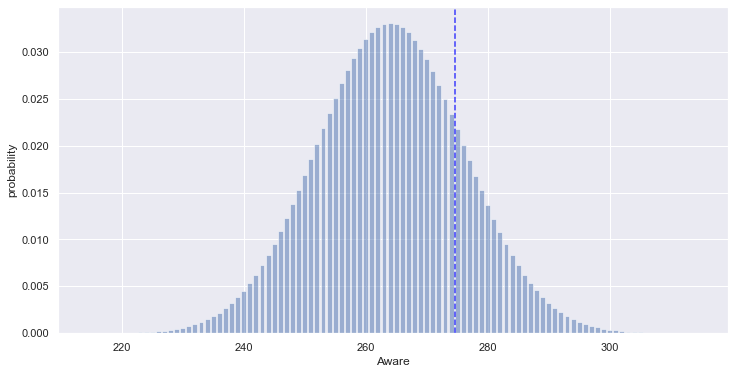

In [31]:
c_aware=ab_summary['yes']['control']
c_total=ab_summary['total']['control']
e_aware=ab_summary['yes']['exposed']
e_total=ab_summary['total']['exposed']
c_cr,e_cr= ab_summary['baseline rate']
dp.cont_distribution(c_aware,c_total,c_cr,e_cr)

### visualization of the two groups

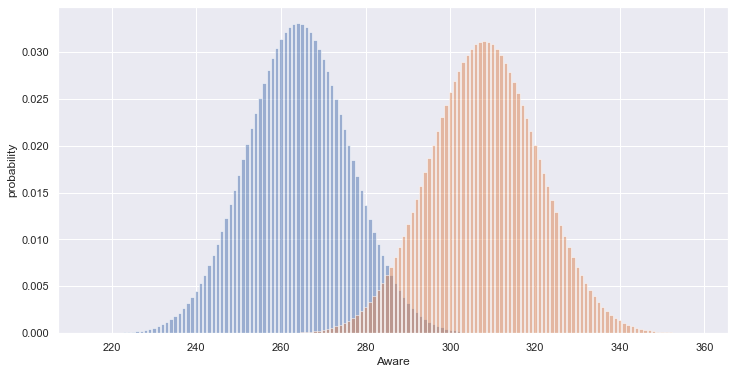

In [32]:
dp.cont_exp_distribution(c_aware,e_aware,c_total,e_total,c_cr,e_cr)

we can see that the controlled group converted more than the exposed group

### Standard Error of Mean

> `SE (control) = √((control baseline rate * (1 - control baseline rate)) / total control )` <br>
> `SE (exposed)= √((exposed baseline rate * (1 - exposed baseline rate)) / total exposed )`

In [33]:
se_control = np.sqrt((c_cr * (1 - c_cr)) / c_total)
se_exposed = np.sqrt((e_cr * (1 - e_cr)) / e_total)

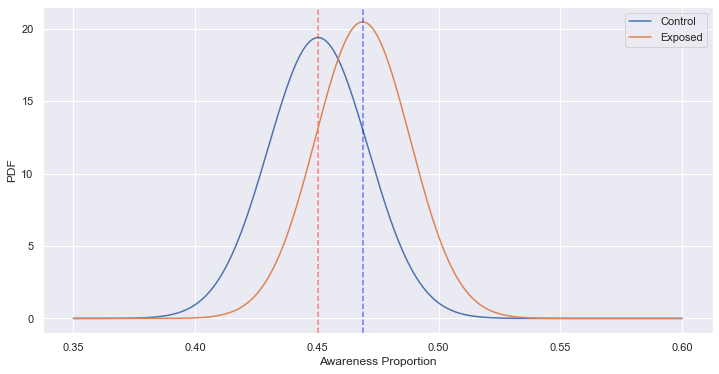

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.linspace(.35, .6, 1000)

yC = scs.norm(c_cr, se_control).pdf(x)
ax.plot(x, yC, label='Control')
ax.axvline(x=c_cr, c='red', alpha=0.5, linestyle='--')

yE = scs.norm(e_cr, se_exposed).pdf(x)
ax.plot(x, yE, label='Exposed')
ax.axvline(x=e_cr, c='blue', alpha=0.5, linestyle='--')

plt.legend()
plt.xlabel('Awareness Proportion')
plt.ylabel('PDF')
plt.show()

we can see the mean conversion rates from each group represented by the vertical broken lines